# Clustering

See our notes on [unsupervised learning](https://jennselby.github.io/MachineLearningCourseNotes/#unsupervised-learning), [K-means](https://jennselby.github.io/MachineLearningCourseNotes/#k-means-clustering), [DBSCAN](https://jennselby.github.io/MachineLearningCourseNotes/#dbscan-clustering), and [clustering validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation).

For documentation of various clustering methods in scikit-learn, see http://scikit-learn.org/stable/modules/clustering.html

This code was based on the example at http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
which has the following comments:

Code source: Gaël Varoquaux<br/>
Modified for documentation by Jaques Grobler<br/>
License: BSD 3 clause
## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
1. Read through the code in the following sections:
    * [Iris Dataset](#Iris-Dataset)
    * [Visualization](#Visualization)
    * [Training and Visualization](#Training-and-Visualization)
2. Complete the three-part [Exercise](#Exercise)

In [24]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

import pandas

# validation and my stuff
from sklearn import metrics
import operator
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

## Iris Dataset

Before you go on, if you haven't used the iris dataset in a previous assignment, make sure you understand it. Modify the cell below to examine different parts of the dataset that are contained in the iris dictionary object.

What are the features? What are we trying to classify?

In [25]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## Visualization Setup

In [27]:
# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

# set some bounds for the figures that will display the plots of clusterings with various
# hyperparameter settings
# this allows for NUM_COLS * NUM_ROWS plots in the figure
NUM_COLS = 4
NUM_ROWS = 6
FIG_WIDTH = 4 * NUM_COLS
FIG_HEIGHT = 3 * NUM_ROWS

def add_plot(figure, subplot_num, subplot_name, data, labels):
    '''Create a new subplot in the figure.'''

    # create a new subplot
    axis = figure.add_subplot(NUM_ROWS, NUM_COLS, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

## Visualization

This is the correct labeling, based on the targets.

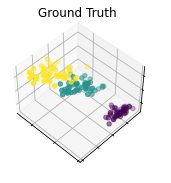

In [28]:
# start a new figure to hold all of the subplots
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(truth_figure, 1, "Ground Truth", iris_df, iris.target)

## Training and Visualization (k-means)

Now let's see how k-means clusters the iris dataset, with various different numbers of clusters

Adjusted rand index = ari
Fowlkes-Mallows index = fmi

2 clusters (ari, fmi): 0.5399218294207123, 0.7504732564880243
3 clusters (ari, fmi): 0.7302382722834697, 0.8208080729114153
4 clusters (ari, fmi): 0.6498176853819967, 0.7565926353252695
5 clusters (ari, fmi): 0.6078964652364223, 0.7254830776265845
6 clusters (ari, fmi): 0.44753353143335994, 0.6024406461434869
7 clusters (ari, fmi): 0.47470836884971374, 0.6298817564777779
8 clusters (ari, fmi): 0.4570179139974683, 0.6167768421241371
9 clusters (ari, fmi): 0.38352798160577894, 0.5571888312179245
10 clusters (ari, fmi): 0.38297441524765025, 0.557552284887695

3 clusters has the highest score for ari: 0.7302382722834697 (fmi score = 0.8208080729114153)
3 clusters has the highest score for fmi: 0.8208080729114153 (ari score = 0.7302382722834697)


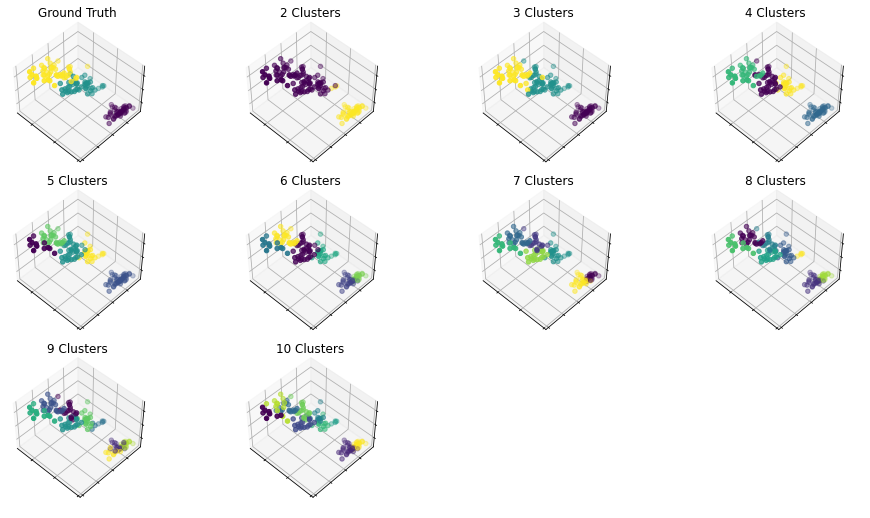

In [29]:
MAX_CLUSTERS = 10

# start a new figure to hold all of the subplots
kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", iris_df, iris.target)

plot_num = 2
rand_scoresK = {}
fm_scoresK = {}
print("Adjusted rand index = ari")
print("Fowlkes-Mallows index = fmi\n")

for num_clusters in range(2, MAX_CLUSTERS + 1):
    
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    
    # get the predictions of which cluster each input is in
    labels = model.labels_

    # plot this clustering
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, iris_df, labels.astype(numpy.float))
    
    # validation
    
    rs = metrics.adjusted_rand_score(iris.target, labels)
    fm = metrics.fowlkes_mallows_score(iris.target, labels)
    
    print(str(num_clusters) + " clusters (ari, fmi): " + str(rs) + ", " + str(fm))
    
    rand_scoresK[num_clusters] = rs
    fm_scoresK[num_clusters] = fm
    
    plot_num += 1

    
# find highest scores    
max_key = max(rand_scoresK.items(), key=operator.itemgetter(1))[0]
print("\n" + str(max_key) + " clusters has the highest score for ari: " + str(rand_scoresK[max_key]) + " (fmi score = " + str(fm_scoresK[max_key]) + ")")

max_key = max(fm_scoresK.items(), key=operator.itemgetter(1))[0]
print(str(max_key) + " clusters has the highest score for fmi: " + str(fm_scoresK[max_key]) + " (ari score = " + str(rand_scoresK[max_key]) + ")")


# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN or hierarchical clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

# DBSCAN

Adjusted rand index = ari
Fowlkes-Mallows index = fmi

Eps = 0.5 (ari, fmi): 0.4739466706963582, 0.7203387341246267
Eps = 0.55 (ari, fmi): 0.49097842226404, 0.6833138496994344
Eps = 0.6 (ari, fmi): 0.5707852353777323, 0.7052432907323563
Eps = 0.65 (ari, fmi): 0.5252971133199177, 0.7049994140786239
Eps = 0.7 (ari, fmi): 0.529074158551589, 0.712499243663433
Eps = 0.75 (ari, fmi): 0.5423004437057594, 0.7274080904440566
Eps = 0.8 (ari, fmi): 0.5550320385120094, 0.7415611035519728
Eps = 0.85 (ari, fmi): 0.560078733112642, 0.7537945541461316
Eps = 0.9 (ari, fmi): 0.5609099839129877, 0.7567359993078075
Eps = 0.95 (ari, fmi): 0.5609099839129877, 0.7567359993078075
Eps = 1.0 (ari, fmi): 0.5621364251426576, 0.7599789117345058
Eps = 1.05 (ari, fmi): 0.5637510205230709, 0.7635170681000877
Eps = 1.1 (ari, fmi): 0.5637510205230709, 0.7635170681000877
Eps = 1.15 (ari, fmi): 0.5681159420289855, 0.7714542762891773
Eps = 1.2 (ari, fmi): 0.5681159420289855, 0.7714542762891773

eps = 0.6 has the highest s

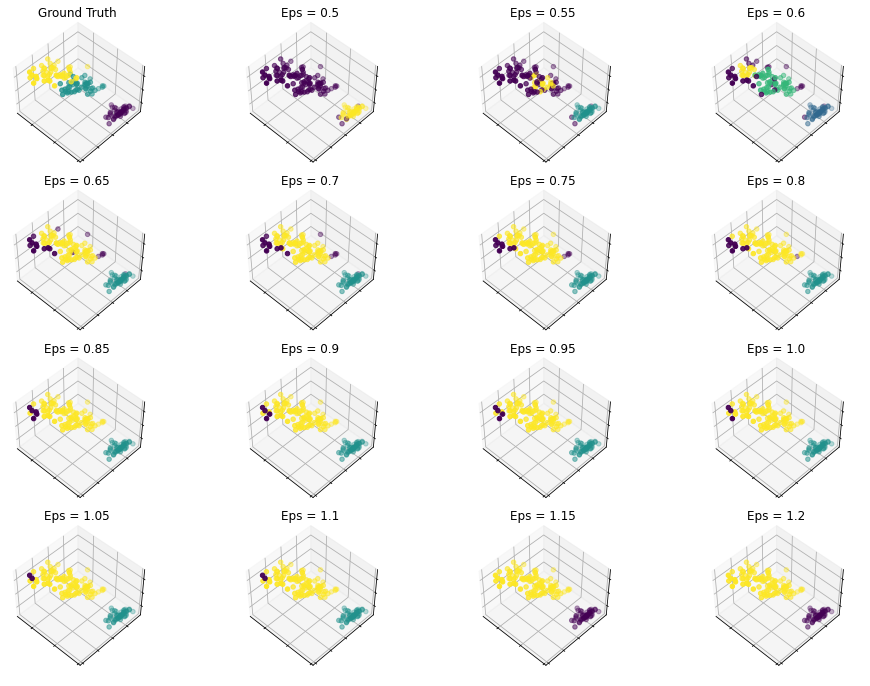

In [30]:
max_eps = 0.5

# start a new figure to hold all of the subplots
dbscan_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(dbscan_figure, 1, "Ground Truth", iris_df, iris.target)

rand_scoresDB = {}
fm_scoresDB = {}

print("Adjusted rand index = ari")
print("Fowlkes-Mallows index = fmi\n")

e = 0.5
plot_num = 2

while e < 1.25:
    # train the model
    model = DBSCAN(eps = e, min_samples = 20)
    model.fit(iris_df)
    
    # get the predictions of which cluster each input is in
    labels = model.labels_

    # plot this clustering
    title = 'Eps = {}'.format(e)
    add_plot(dbscan_figure, plot_num, title, iris_df, labels.astype(numpy.float))
    
    # validation
    
    rs = metrics.adjusted_rand_score(iris.target, labels)
    fm = metrics.fowlkes_mallows_score(iris.target, labels)
    
    print("Eps = " + str(e) + " (ari, fmi): " + str(rs) + ", " + str(fm))
    
    rand_scoresDB[e] = rs
    fm_scoresDB[e] = fm
    
    plot_num += 1
    e += 0.05
    e = float('%.2f'%(e)) # cut off extra decimal points

    
# find highest scores    
max_key = max(rand_scoresDB.items(), key=operator.itemgetter(1))[0]
print("\neps = " + str(max_key) + " has the highest score for ari: " + str(rand_scoresDB[max_key]) + " (fmi score = " + str(fm_scoresDB[max_key]) + ")")

max_key = max(fm_scoresDB.items(), key=operator.itemgetter(1))[0]
print("eps = " + str(max_key) + " has the highest score for fmi: " + str(fm_scoresDB[max_key]) + " (ari score = " + str(rand_scoresDB[max_key]) + ")")

# Agglo

Adjusted rand index = ari
Fowlkes-Mallows index = fmi

2 clusters (ari, fmi): 0.5681159420289855, 0.7714542762891773
3 clusters (ari, fmi): 0.7311985567707745, 0.8221697785442927
4 clusters (ari, fmi): 0.660216985695529, 0.7640552995391705
5 clusters (ari, fmi): 0.59502294387575, 0.7159643363951427
6 clusters (ari, fmi): 0.43579133281242055, 0.5929856967081084
7 clusters (ari, fmi): 0.44815339333973314, 0.6063337398482096
8 clusters (ari, fmi): 0.42518403645309816, 0.5881145508833174
9 clusters (ari, fmi): 0.4022311804568699, 0.5704109837591792
10 clusters (ari, fmi): 0.34223126763609907, 0.5199453096672506

3 clusters has the highest score for ari: 0.7311985567707745 (fmi score = 0.8208080729114153)
3 clusters has the highest score for fmi: 0.8221697785442927 (ari score = 0.7302382722834697)


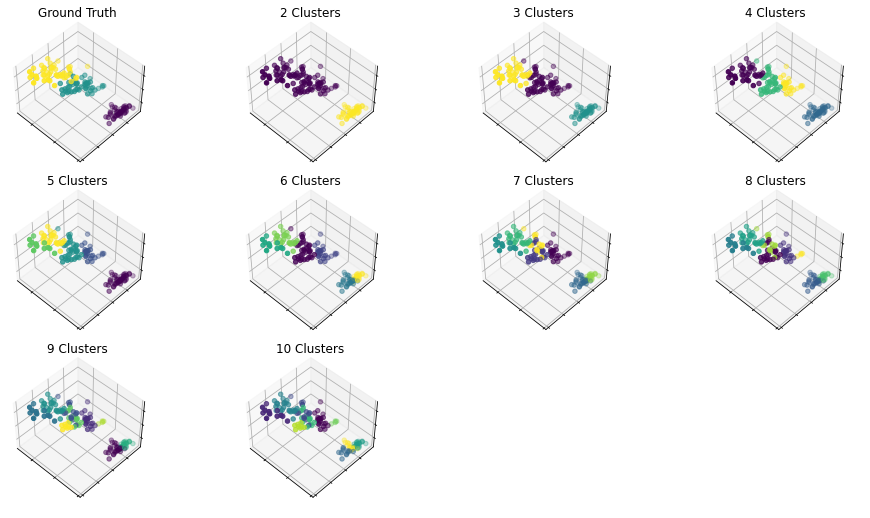

In [31]:
MAX_CLUSTERS = 10

# start a new figure to hold all of the subplots
agglo_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(agglo_figure, 1, "Ground Truth", iris_df, iris.target)

plot_num = 2
rand_scoresA = {}
fm_scoresA = {}
print("Adjusted rand index = ari")
print("Fowlkes-Mallows index = fmi\n")

for num_clusters in range(2, MAX_CLUSTERS + 1):
    
    # train the model
    model = AgglomerativeClustering(n_clusters=num_clusters)
    model.fit(iris_df)
    
    # get the predictions of which cluster each input is in
    labels = model.labels_

    # plot this clustering
    title = '{} Clusters'.format(num_clusters) 
    add_plot(agglo_figure, plot_num, title, iris_df, labels.astype(numpy.float))
    
    # validation
    
    rs = metrics.adjusted_rand_score(iris.target, labels)
    fm = metrics.fowlkes_mallows_score(iris.target, labels)
    
    print(str(num_clusters) + " clusters (ari, fmi): " + str(rs) + ", " + str(fm))
    
    rand_scoresA[num_clusters] = rs
    fm_scoresA[num_clusters] = fm
    
    plot_num += 1

    
# find highest scores    
max_key = max(rand_scoresA.items(), key=operator.itemgetter(1))[0]
print("\n" + str(max_key) + " clusters has the highest score for ari: " + str(rand_scoresA[max_key]) + " (fmi score = " + str(fm_scoresK[max_key]) + ")")

max_key = max(fm_scoresA.items(), key=operator.itemgetter(1))[0]
print(str(max_key) + " clusters has the highest score for fmi: " + str(fm_scoresA[max_key]) + " (ari score = " + str(rand_scoresK[max_key]) + ")")


# What I think about the scores of these 3 models

K-means:  
3 clusters has the highest score for ari: 0.7302382722834697 (fmi score = 0.8208080729114153)  
3 clusters has the highest score for fmi: 0.8208080729114153 (ari score = 0.7302382722834697)

DBSCAN:  
eps = 0.6 has the highest score for ari: 0.5707852353777323 (fmi score = 0.7052432907323563)  
eps = 1.15 has the highest score for fmi: 0.7714542762891773 (ari score = 0.5681159420289855)

Agglomerative:  
3 clusters has the highest score for ari: 0.7311985567707745 (fmi score = 0.8208080729114153)  
3 clusters has the highest score for fmi: 0.8221697785442927 (ari score = 0.7302382722834697)

---

The highest score from the k-means and agglomerative models were identical, but some of the scores for other numbers of clusters were slighly different. One reason the scores are so close is because the iris dataset is pretty simple, so there are not a lot of ways which one of the models could branch off and take a different path to forming clusters—and the dataset might be super seperated and easy to model if there is a set number of clusters (eg 3). Agglomerative and k-means clustering are also somewhat similar in algorithmic method—they both work towards a set number of clusters (DBSCAN does not) which could further influence the similarity, and perhaps these scores might also be influenced by the number of clusters more than how correct the predictions are (that's a wild guess but it could be true). Besides those speculations, I don't know why these scores are so close.

DBSCAN finds an arbitrary number of clusters based on the minimum distance between points and the minimum points per cluster. I only iterated through epsilon values (min dist between points), and kept the min points per cluster the same at 20. The highest scores for both ari and fmi for DBSCAN were lower than the highest scores for k-means and agglo. This would seem to be pretty obviously because the DBSCAN model does not optimize for number of clusters, so its more than likely going to end up with a "incorrect" number of clusters, which would probably decrease the score. It's definitely possible to get a better score with 4 clusters than 3 though, so that's not necessarily a bad thing.